In [1]:
%matplotlib inline

import numpy as np
from mnist_data_loader import MnistDataloader
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = '../data/mnist'
training_images_filepath = (f'{input_path}/train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = (f'{input_path}/train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = (f'{input_path}/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = (f'{input_path}/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    


In [2]:
x_tr = np.array(x_train)
y_tr = np.array(y_train).reshape(len(y_train), -1).T

x_tt = np.array(x_test)
y_tt = np.array(y_test).reshape(len(y_test), -1).T

x_tt = x_tt.reshape(len(x_tt), 1, 28, 28)/255
x_tr = x_tr.reshape(len(x_tr), 1, 28, 28)/255

y_tr.shape

(1, 60000)

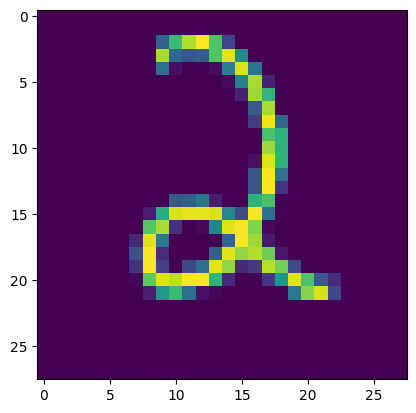

In [3]:
ind = 47

plt.imshow(x_tt[ind][0])
plt.show()

In [4]:
from cnn import cnn

model = cnn()
model.first_conv_layer((1, 28, 28), 16, 3, 1)
model.maxpooling_layer()
model.conv_layer(32, 3)
model.maxpooling_layer()
model.lin_layer(10)
model.lin_layer(10, 'softmax')

model.model_info()

capa 0
	tipo: conv1
	input shape: (1, 28, 28)
	kernel list shape: (16, 1, 3, 3)
	output shape: (16, 28, 28)


capa 1
	tipo: mpool1
	input shape: (16, 28, 28)
	output shape: (16, 14, 14)


capa 2
	tipo: conv2
	input shape: (16, 14, 14)
	kernel list shape: (32, 16, 3, 3)
	output shape: (32, 12, 12)


capa 3
	tipo: mpool2
	input shape: (32, 12, 12)
	output shape: (32, 6, 6)


capa 4
	tipo: lin1
	W shape: (10, 1152)
	activation: relu


capa 5
	tipo: lin2
	W shape: (10, 10)
	activation: softmax




## entrenamiento del modelo

In [5]:
learning_rate = 0.01
epochs = 3
batch_size = 228

model.learning(epochs, batch_size, learning_rate, x_tr, y_tr)

228
epoch:1; 1/263 batch
presición 0.10964912280701754
228
epoch:1; 2/263 batch
presición 0.11403508771929824
228
epoch:1; 3/263 batch
presición 0.10964912280701754
228
epoch:1; 4/263 batch
presición 0.12719298245614036
228
epoch:1; 5/263 batch
presición 0.09210526315789473
228
epoch:1; 6/263 batch
presición 0.10526315789473684
228
epoch:1; 7/263 batch
presición 0.13596491228070176
228
epoch:1; 8/263 batch
presición 0.14473684210526316
228
epoch:1; 9/263 batch
presición 0.12719298245614036
228
epoch:1; 10/263 batch
presición 0.18421052631578946
228
epoch:1; 11/263 batch
presición 0.15350877192982457
228
epoch:1; 12/263 batch
presición 0.14473684210526316
228
epoch:1; 13/263 batch
presición 0.21052631578947367
228
epoch:1; 14/263 batch
presición 0.14912280701754385
228
epoch:1; 15/263 batch
presición 0.17982456140350878
228
epoch:1; 16/263 batch
presición 0.19298245614035087
228
epoch:1; 17/263 batch
presición 0.17982456140350878
228
epoch:1; 18/263 batch
presición 0.19736842105263158
2

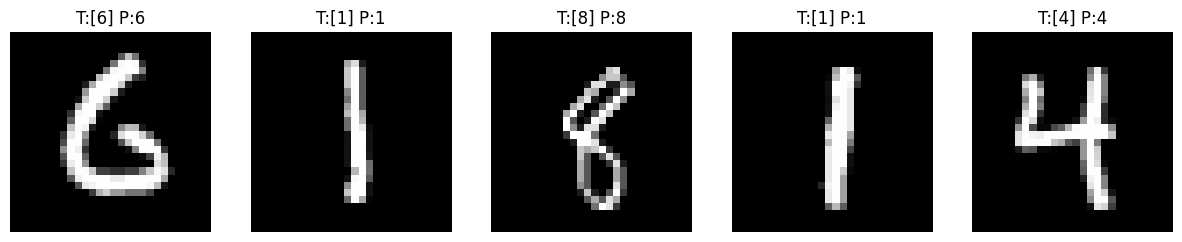

In [65]:
n = 5
idx = np.random.choice(len(x_tt), n, replace=False)
X_sample = x_tt[idx]
y_true = y_tt[:,idx]
y_pred = model.test_predic(X_sample)

fig, axes = plt.subplots(1, n, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_sample[i].squeeze(), cmap="gray")
    ax.set_title(f"T:{y_true[:,i]} P:{y_pred[i]}")
    ax.axis("off")
plt.show()


In [28]:
src = '../models/cnn_mnist_params'
model.save_params(src)

In [5]:
## modelo lineal

lin_mod = cnn()
lin_mod.lin_layer_only(28*28, 10)
lin_mod.lin_layer(10, 'softmax')

In [6]:
x_tr.shape

x_tr_lin = x_tr.reshape(60000, -1)
x_tr_lin.shape

(60000, 784)

In [7]:
lin_mod.learning(100, 228, 0.01, x_tr, y_tr)

epoch:1; 1/263 batch
presición 0.09649122807017543
epoch:1; 2/263 batch
presición 0.12719298245614036
epoch:1; 3/263 batch
presición 0.08333333333333333
epoch:1; 4/263 batch
presición 0.04824561403508772
epoch:1; 5/263 batch
presición 0.08333333333333333
epoch:1; 6/263 batch
presición 0.07017543859649122
epoch:1; 7/263 batch
presición 0.05263157894736842
epoch:1; 8/263 batch
presición 0.10526315789473684
epoch:1; 9/263 batch
presición 0.09210526315789473
epoch:1; 10/263 batch
presición 0.10526315789473684
epoch:1; 11/263 batch
presición 0.08333333333333333
epoch:1; 12/263 batch
presición 0.08771929824561403
epoch:1; 13/263 batch
presición 0.10087719298245613
epoch:1; 14/263 batch
presición 0.10087719298245613
epoch:1; 15/263 batch
presición 0.07017543859649122
epoch:1; 16/263 batch
presición 0.13157894736842105
epoch:1; 17/263 batch
presición 0.06578947368421052
epoch:1; 18/263 batch
presición 0.08771929824561403
epoch:1; 19/263 batch
presición 0.07456140350877193
epoch:1; 20/263 batch

## mostrar salidas del modelo

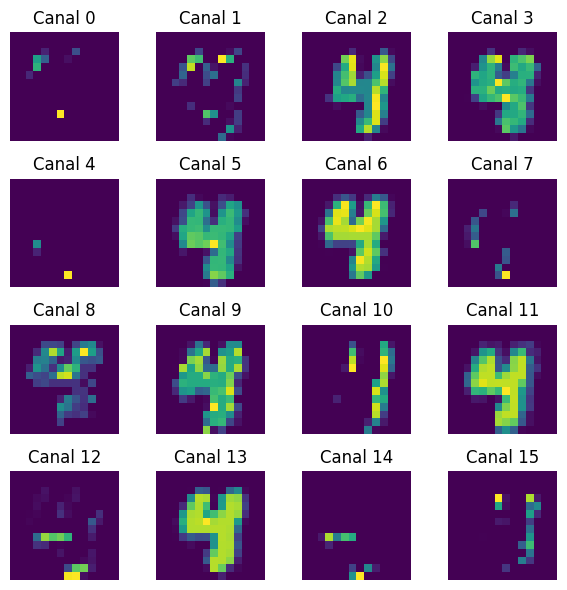

In [ ]:
# Sacamos la muestra del batch
activations = model_out[0]

# Preparamos una grilla para mostrar todos los canales
fig, axes = plt.subplots(4, 4, figsize=(6, 6))  # 4 filas, 8 columnas

for i, ax in enumerate(axes.flat):
    ax.imshow(activations[i], cmap='viridis')  # Mostramos canal i
    ax.set_title(f"Canal {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()


## Autoencoder

In [3]:
from models import model

m = model()
m.first_conv_layer((1, 28, 28), 16, 3, 1, 3)
m.conv_layer(32, 3, 1, 3)
m.lin_layer(8, activ=None)
m.deconv_layer(16, 3, 1, 3)
m.deconv_layer(1, 3, 1, 3, activation='sigmoid')

m.optimizer_SGD()
m.model_info()

capa 0
	tipo: conv1
	input shape: (1, 28, 28)
	kernel list shape: (16, 1, 3, 3)
	output shape: (16, 10, 10)


capa 1
	tipo: conv2
	input shape: (16, 10, 10)
	kernel list shape: (32, 16, 3, 3)
	output shape: (32, 4, 4)


capa 2
	tipo: lin1
	W shape: (8, 512)
	activation: None


capa 3
	tipo: lin2
	W shape: (512, 8)
	activation: None


capa 4
	tipo: deconv1
	input shape: (32, 4, 4)
	kernel list shape: (16, 32, 3, 3)
	output shape: (16, 10, 10)
	activation: relu


capa 5
	tipo: deconv2
	input shape: (16, 10, 10)
	kernel list shape: (1, 16, 3, 3)
	output shape: (1, 28, 28)
	activation: sigmoid




In [4]:
x = x_tt[0]

x = x.reshape(1, 1, 28, 28)

m.forward_pass(x)

NameError: name 'm' is not defined

In [4]:
epoch = 5
batch_size = 512
lr = 0.001

x_tr_s = x_tr[:7000]
y_tr_s = y_tr[:,:7000]

m.learning(epoch, batch_size, lr, x_tr_s, y_tr_s)

KeyError: 'deconv2'